In [1]:
from google.colab import output
!pip install chart_studio
!pip install pyecharts
!pip install echarts-themes-pypkg
output.clear()

In [2]:
import pandas as pd
from pandas import Series
import numpy as np
from datetime import date

import copy, json
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')

from IPython.display import IFrame
import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.io as pio

from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar, Bar3D, Grid, Line, Liquid, Page, Pie, Timeline, Tab, Map, Grid
from pyecharts import options as opts

import folium, webbrowser, IPython, warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pyecharts
---

In [ ]:
!pip install pyecharts

     |████████████████████████████████| 143kB 18.8MB/s 
     |████████████████████████████████| 133kB 33.5MB/s 


In [ ]:
# import Pyecharts
import pyecharts

print(pyecharts.__version__)


from IPython.display import IFrame

1.9.0


# Barplot
---

In [ ]:
from pyecharts.charts import Bar

# barplot을 그리기 위한 객체 생성
bar = Bar()

# Xaxis, Yaxis 값 지정
bar.add_xaxis(['A','B','C','D','E'])
bar.add_yaxis('Chart Title', [10, 20, 30, 40, 50]) # Title 지정 가능
bar.render('bar.html') # render 메소드를 통해 html 파일로 다운로드 가능

'/content/bar.html'

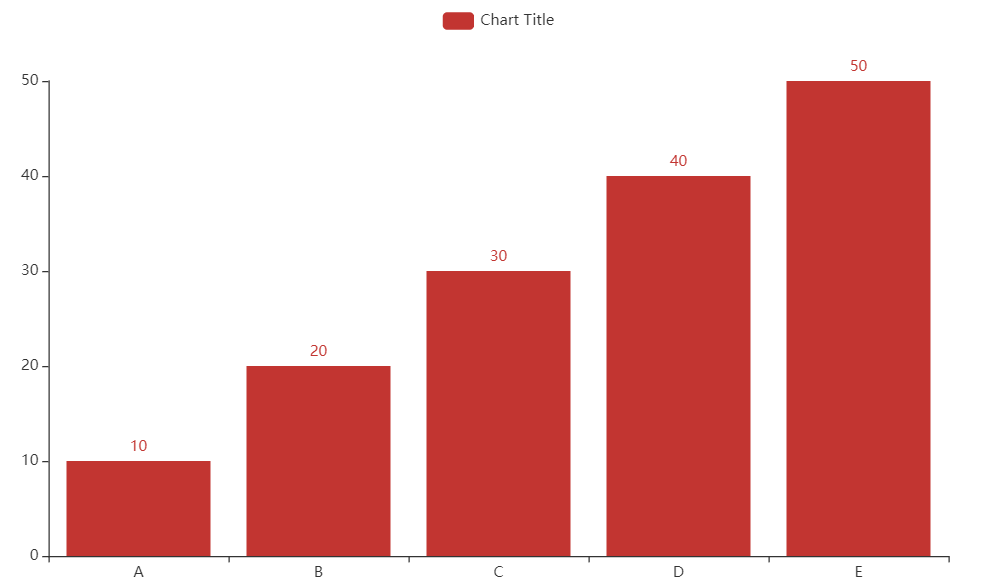

# options 설정 항목
---

In [ ]:
from pyecharts.charts import Bar
from pyecharts import options as opts



In [ ]:
bar = (
    Bar()
    .add_xaxis(['A','B','C','D','E'])
    .add_yaxis("Title", [10, 20, 30, 40, 50]) # 레이블 제목
    .set_global_opts(title_opts=opts.TitleOpts(title="Title", subtitle="subtitle")) # 타이틀, 서브타이틀 지정
    # 或者直接使用字典参数
    # .set_global_opts(title_opts={"text": "主标题", "subtext": "副标题"})
)
bar.render('bar_2.html')

'/content/bar_2.html'

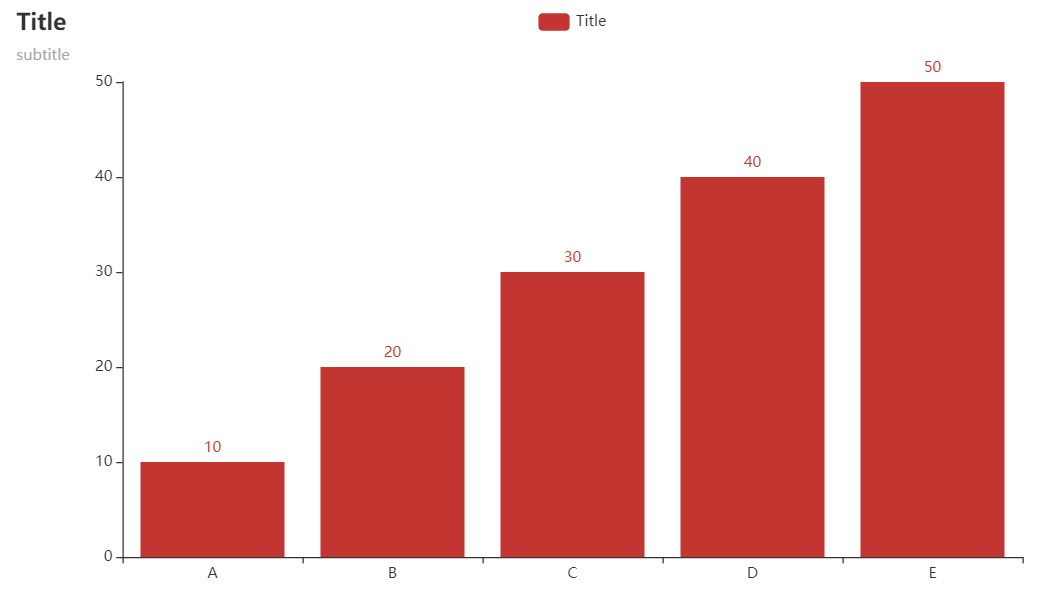

# 테마사용
---

In [ ]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)) # 테마 지정
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
    .add_yaxis("商家B", [15, 6, 45, 20, 35, 66])
    .set_global_opts(title_opts=opts.TitleOpts(title="主标题", subtitle="副标题"))
)

bar.render('bar_3.html')

'/content/bar_3.html'

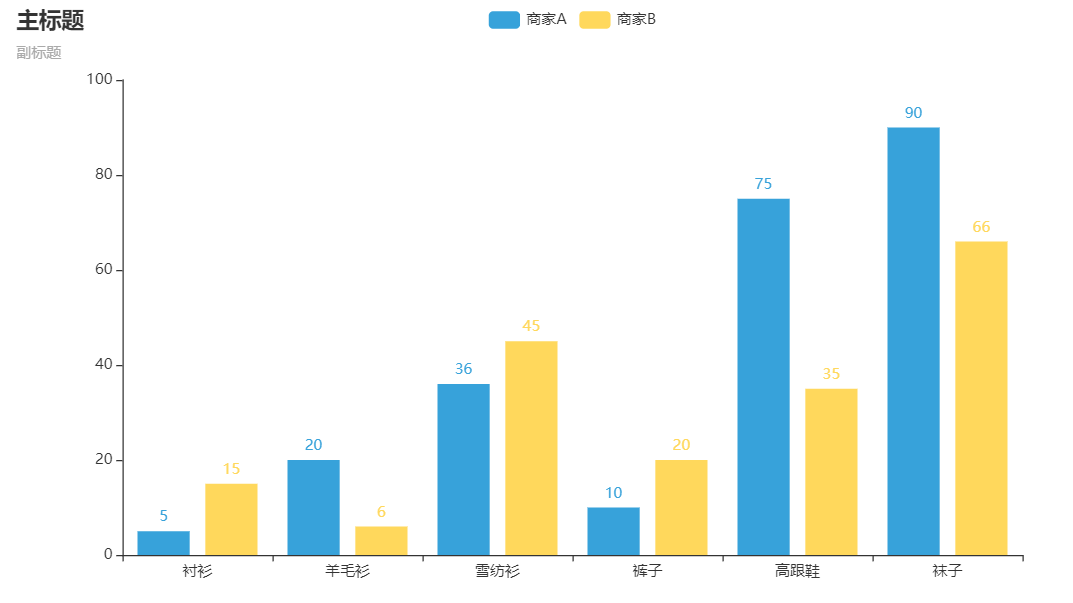

# 전역 설정 항목을 set_global_opts 메소드로 설정할 수 있습니다.

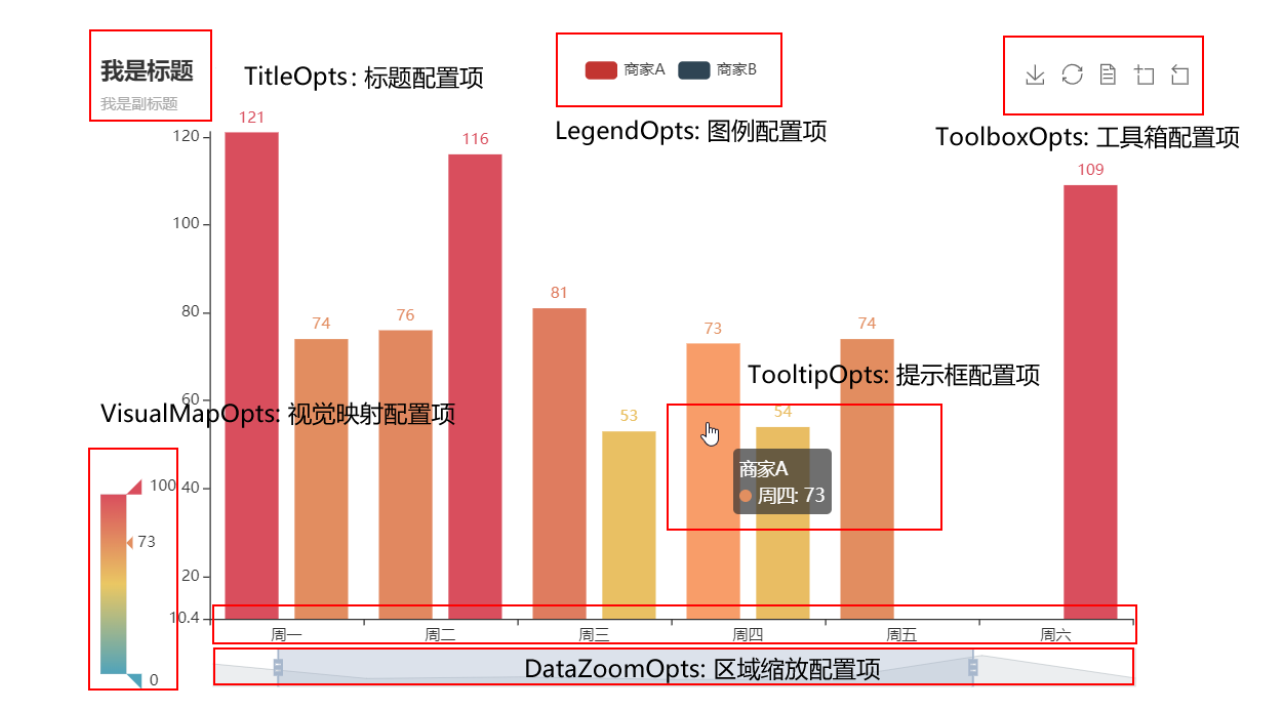

themes : https://pyecharts.org/#/zh-cn/themes

In [ ]:
c = Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))

In [ ]:
 from pyecharts.globals import CurrentConfig, NotebookType
 CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
    .add_xaxis(['A','B','C','D','E'])
    .add_yaxis('First', [10, 20, 30, 40, 50])
    .add_yaxis('Second', [20, 30, 40, 50, 60])
    .set_global_opts(title_opts=opts.TitleOpts(title='Title', subtitle='Subtitle'))
)

bar.render('bar_4.html')

'/content/bar_4.html'

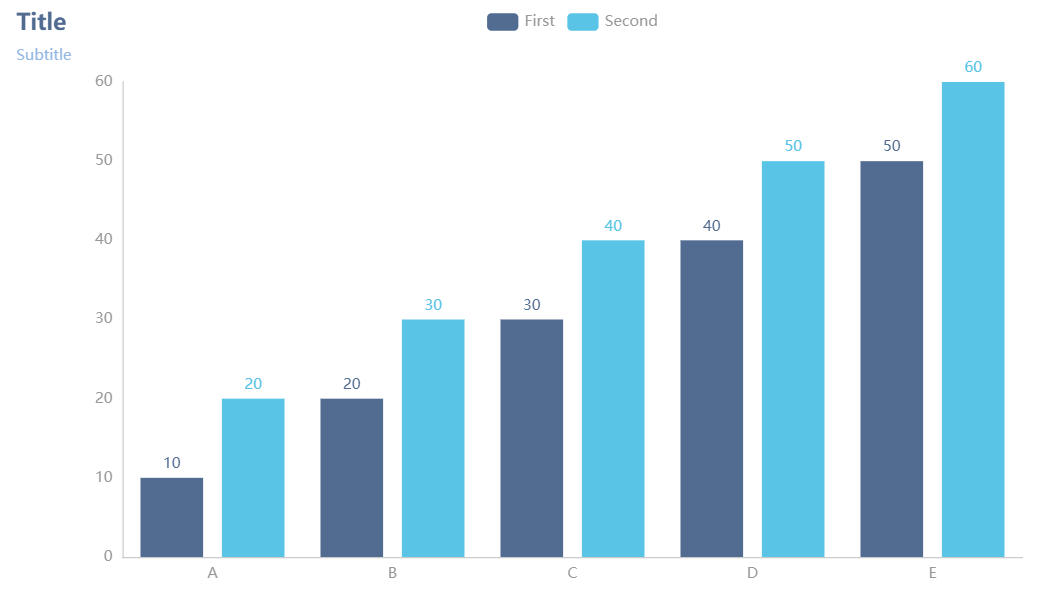

# line chart
---

In [ ]:
from pyecharts.charts import Line
line = (
    Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
    .add_xaxis(['A','B','C','D','E'])
    .add_yaxis('First', [10, 20, 30, 40, 50])
    .add_yaxis('Second', [20, 30, 40, 50, 60])
    .set_global_opts(title_opts=opts.TitleOpts(title='Title', subtitle='Subtitle'))
)
line.render('line1.html')

'/content/line1.html'

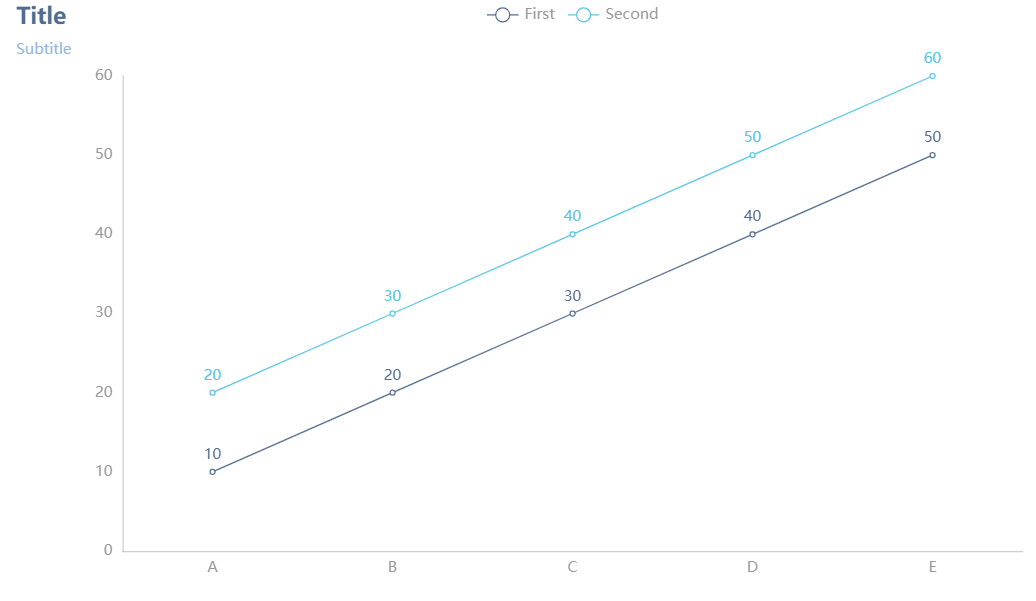

# 아파트 실거래지수 시각화
---

# 실거래가격지수 시각화
---

In [ ]:
df_apt_2 = pd.read_csv('../아파트_실거래_filtered.csv')

In [ ]:
index = df_apt_2.index.tolist()

fig_apt= (Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('전국', df_apt_2['전국[2017.11=100]'].tolist())
       .add_yaxis('서울', df_apt_2['서울[2017.11=100]'].tolist())
       .add_yaxis('대전', df_apt_2['대전[2017.11=100]'].tolist())
       .add_yaxis('대구', df_apt_2['대구[2017.11=100]'].tolist())
       .add_yaxis('세종', df_apt_2['대전[2017.11=100]'].tolist())
       .add_yaxis('경기', df_apt_2['경기[2017.11=100]'].tolist()))

fig_apt.add_xaxis(index).set_global_opts(title_opts=opts.TitleOpts(title="지가 변동률이 높은 지역의 아파트 실거래지수 비교",subtitle="커서와 스크롤을 조절해 실거래지수를 비교해보세요!"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "실거래지수",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                 legend_opts=opts.LegendOpts(pos_left="60%",legend_icon='pin')
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))

fig_apt = (Grid(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
                    .add(fig_apt, grid_opts=opts.GridOpts()))

fig_apt.render('실거래.html')

'/content/실거래.html'

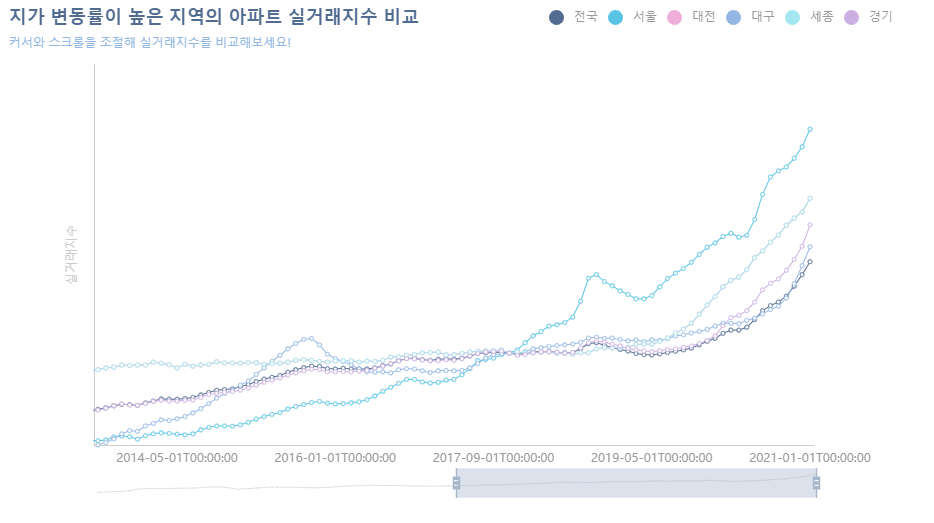

# 지가변동률 시각화
---

In [ ]:
df_apt_1 = pd.read_csv('../지역별_지가변동률.csv')
df_apt_1

,Unnamed: 0,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
0,2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
1,2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2,2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
3,2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
4,2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020-10-01,0.294,0.375,0.337,0.265,0.295,0.277,0.375,0.138,1.077,0.307,0.194,0.244,0.206,0.190,0.255,0.189,0.048,-0.088
190,2020-11-01,0.322,0.405,0.458,0.326,0.287,0.370,0.416,0.161,1.378,0.310,0.209,0.269,0.206,0.214,0.293,0.186,0.087,-0.068
191,2020-12-01,0.343,0.437,0.444,0.387,0.295,0.389,0.417,0.180,1.103,0.327,0.243,0.280,0.232,0.219,0.312,0.200,0.132,-0.004
192,2021-01-01,0.311,0.408,0.281,0.342,0.297,0.305,0.386,0.184,0.818,0.308,0.219,0.247,0.205,0.196,0.295,0.183,0.121,-0.012


In [ ]:
index = df_apt_1['Unnamed: 0'].tolist()

fig_apt= (Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('전국', df_apt_1['전국[%]'].tolist())
       .add_yaxis('서울', df_apt_1['서울[%]'].tolist())
       .add_yaxis('대전', df_apt_1['대전[%]'].tolist())
       .add_yaxis('대구', df_apt_1['대구[%]'].tolist())
       .add_yaxis('세종', df_apt_1['세종[%]'].tolist())
       .add_yaxis('경기', df_apt_1['경기[%]'].tolist()))

fig_apt.add_xaxis(index).set_global_opts(title_opts=opts.TitleOpts(title="어떤 지역의 지가변동률이 높을까?",subtitle="커서와 스크롤을 조절해 실거래지수를 비교해보세요!"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "실거래지수",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                 legend_opts=opts.LegendOpts(pos_left="60%",legend_icon='pin')
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))

fig_apt = (Grid(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
                    .add(fig_apt, grid_opts=opts.GridOpts()))

fig_apt.render('지역별_지가변동률.html')

'/content/지역별_지가변동률.html'

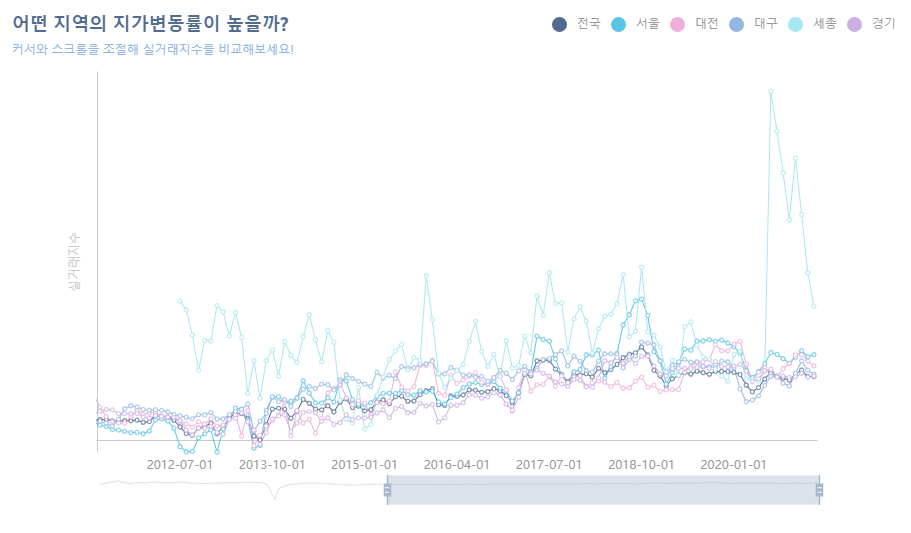

연도별로 미분양 비율의 변화가 어떻게 달라지는가?

# TAB, 미분양 비율 라인그래프, 미분양 비율 타임 슬라이더

In [ ]:
df = pd.read_csv('cal.csv')
df.year = df.year.astype('str')
df.year = pd.to_datetime(df.year)
df.index = df.year
df = df[['year', '서울[호]', '대구[호]', '대전[호]', '경기[호]', '세종[호]']]
df.head()

,year,서울[호],대구[호],대전[호],경기[호],세종[호]
year,,,,,,
2007-01-01,2007-01-01,0.0084,0.1252,0.0156,0.0626,0.0
2008-01-01,2008-01-01,0.0092,0.1291,0.0197,0.1402,0.0
2009-01-01,2009-01-01,0.0147,0.1310,0.0229,0.1428,0.0
2010-01-01,2010-01-01,0.0197,0.1471,0.0252,0.2081,0.0
2011-01-01,2011-01-01,0.0263,0.1448,0.0195,0.2958,0.0


In [ ]:
df.year = df.year.dt.year

In [ ]:
df_melt = pd.melt(df, id_vars='year', var_name='지역', value_name='비율')
df_melt['비율'] = round(df_melt['비율'] * 100, 2)

In [ ]:
df_melt.head()

,year,지역,비율
0,2007,서울[호],0.84
1,2008,서울[호],0.92
2,2009,서울[호],1.47
3,2010,서울[호],1.97
4,2011,서울[호],2.63


In [ ]:
tab = Tab()

index = df.index.tolist()


fig_line= (Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('서울', df['서울[호]'].tolist())
       .add_yaxis('대전', df['대전[호]'].tolist())
       .add_yaxis('대구', df['대구[호]'].tolist())
       .add_yaxis('세종', df['세종[호]'].tolist())
       .add_yaxis('경기', df['경기[호]'].tolist())
)

fig_line.add_xaxis(index).set_global_opts(title_opts=opts.TitleOpts(title="미분양 주택 비율 변화 추이",subtitle="커서와 스크롤을 조절해 미분양 주택 비율 변화를 비교해보세요!"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "실거래지수",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                 legend_opts=opts.LegendOpts(pos_left="60%",legend_icon='pin')
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))

fig_line = (Grid(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
                    .add(fig_line, grid_opts=opts.GridOpts()))



# 막대 그래프
fig_time = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS)).add_schema(is_auto_play=True) 

for t in df_melt['year'].unique():
  fig_time.add((Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS)).add_xaxis(df_melt['지역'].unique().tolist())
               .add_yaxis('', df_melt[df_melt['year'] == t]['비율'].tolist(),
                          label_opts=opts.LabelOpts(formatter="{c}%"))
               .set_global_opts(title_opts=opts.TitleOpts(title="연도별 미분양 주택 비율", subtitle="마우스를 막대에 올려 정확한 수치를 확인해보세요!"),
                                yaxis_opts=opts.AxisOpts(name='만족도(%)', max_=100, name_location = "start"),
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"))),"{}년도".format(t))
  

tab.add(fig_line, '미분양 주택 비율 변화 추이')
tab.add(fig_time, '연도별 미분양 주택 비율')

tab.render('미분양 주택 비율 변화량 비교.html')

'/content/미분양 주택 비율 변화량 비교.html'

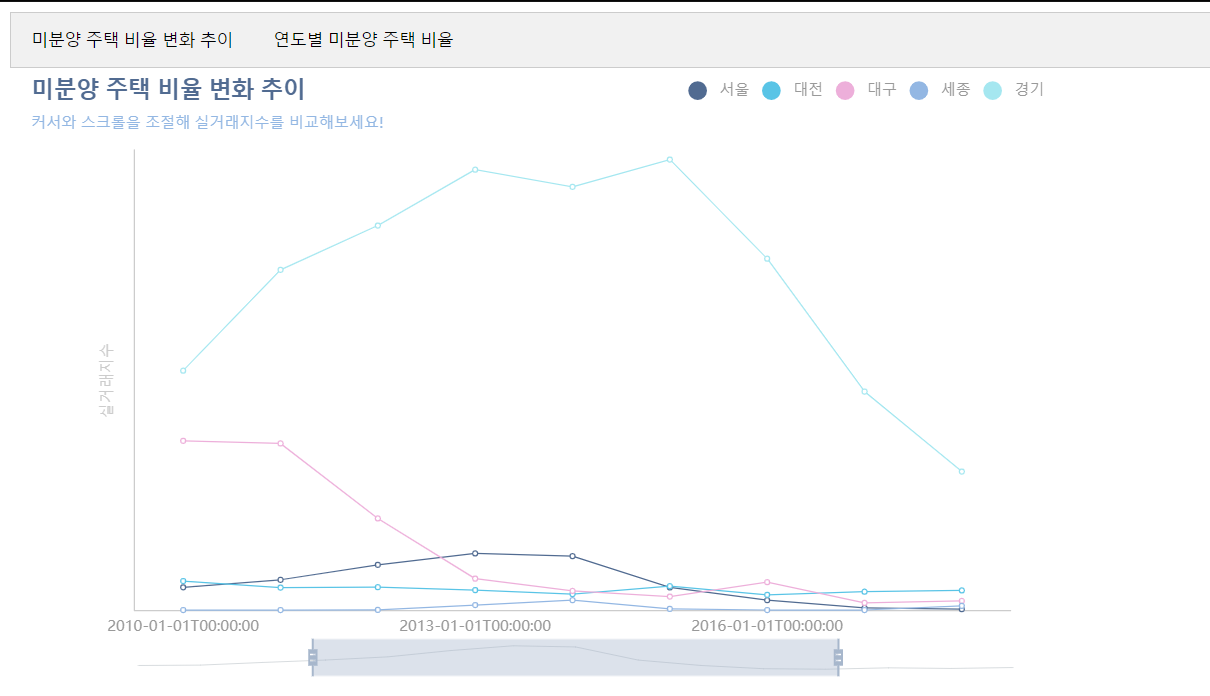

# 연도별 실거래지수 비교

In [ ]:
df_2006 = pd.read_csv('df_2006.csv')
df_2010 = pd.read_csv('df_2010.csv')
df_2014 = pd.read_csv('df_2014.csv')
df_2018 = pd.read_csv('df_2018.csv')
df_2021 = pd.read_csv('df_2021.csv')

In [ ]:
df_2006['year'] = pd.to_datetime('2006')
df_2010['year'] = pd.to_datetime('2010')
df_2014['year'] = pd.to_datetime('2014')
df_2018['year'] = pd.to_datetime('2018')
df_2021['year'] = pd.to_datetime('2021')

In [ ]:
df = pd.concat([df_2006, df_2010, df_2014, df_2018, df_2021])
df.head()

,Unnamed: 0,0,year
0,전국[2017.11=100],66.175000,2006-01-01
1,서울[2017.11=100],66.133333,2006-01-01
2,대구[2017.11=100],61.716667,2006-01-01
3,대전[2017.11=100],74.175000,2006-01-01
4,세종[2017.11=100],70.558333,2006-01-01


In [ ]:
df.year = df.year.dt.year

In [ ]:
df.columns = ['지역', '실거래지수', '연도']

In [ ]:
df.head()

,지역,실거래지수,연도
0,전국[2017.11=100],66.175000,2006
1,서울[2017.11=100],66.133333,2006
2,대구[2017.11=100],61.716667,2006
3,대전[2017.11=100],74.175000,2006
4,세종[2017.11=100],70.558333,2006


In [ ]:

fig_satisfy = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS)).add_schema(is_auto_play=True) 

for t in df['연도'].unique():
  fig_satisfy.add((Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
                    .add("", [list(z) for z in zip(df['지역'], df[df['연도'] == t]['실거래지수'])],
                    rosetype="radius",radius=["30%", "60%"],
                    label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}"))
         .set_global_opts(title_opts=opts.TitleOpts("연도별 평균 실거래지수 비교", subtitle = "마우스를 파이에 올려 실거래지수를 확인해보세요!"),
                          legend_opts=opts.LegendOpts(type_ = 'scroll', pos_bottom ="70%",pos_right="0%", orient="vertical",legend_icon ='pin'))),"{}도".format(t))

  
fig_satisfy.render('연도별실거래지수.html')

'/content/연도별실거래지수.html'

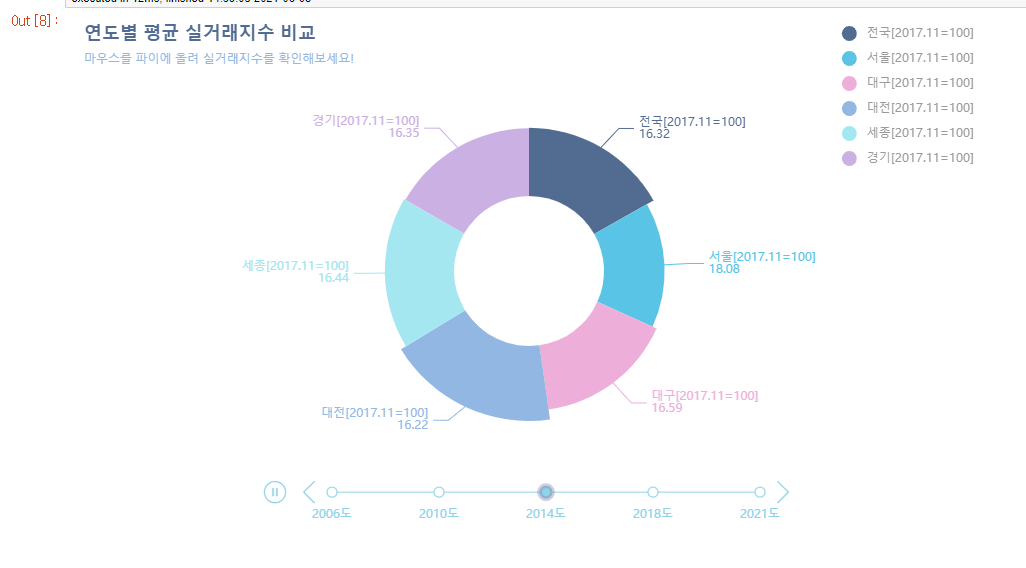

# 주식데이터 분석

In [7]:
# 주식데이터 로드

IT서비스 = pd.read_csv('./NAVER.csv')

기계 = pd.read_csv('./두산중공업.csv')
통신서비스 = pd.read_csv('./KT.csv')


# 반도체
SK하이닉스 = pd.read_csv('./SK하이닉스.csv')
삼성전자 = pd.read_csv('./삼성전자.csv')
반도체 = (SK하이닉스[['Open','High','Low','Close','Adj Close', 'Volume']] + 삼성전자[['Open','High','Low','Close','Adj Close', 'Volume']]) / 2
반도체['Date'] = 삼성전자['Date']

# 자동차
기아 = pd.read_csv('./기아.csv')
현대 = pd.read_csv('./현대차.csv')
자동차 = (기아[['Open','High','Low','Close','Adj Close', 'Volume']] + 현대[['Open','High','Low','Close','Adj Close', 'Volume']]) / 2
자동차['Date'] = 기아['Date']

# 제약
제약 = pd.read_csv('./셀트리온.csv')

#철강 = pd.read_csv('./POSCO.csv')

# Date 컬럼 시계열 데이터 처리

IT서비스.Date = pd.to_datetime(IT서비스.Date)
기계.Date = pd.to_datetime(기계.Date)
통신서비스.Date = pd.to_datetime(통신서비스.Date)
반도체.Date = pd.to_datetime(반도체.Date)
제약.Date = pd.to_datetime(제약.Date)
자동차.Date = pd.to_datetime(자동차.Date)
#철강.Date = pd.to_datetime(철강.Date)

In [8]:
# Date 컬럼 시계열 데이터 처리

IT서비스.Date = pd.to_datetime(IT서비스.Date)
기계.Date = pd.to_datetime(기계.Date)
통신서비스.Date = pd.to_datetime(통신서비스.Date)
반도체.Date = pd.to_datetime(반도체.Date)
제약.Date = pd.to_datetime(제약.Date)
자동차.Date = pd.to_datetime(자동차.Date)
#철강.Date = pd.to_datetime(철강.Date)

In [15]:
index = IT서비스.Date.tolist()

fig_stock= (Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('IT서비스', IT서비스['Adj Close'].tolist())
       .add_yaxis('기계', 기계['Adj Close'].tolist())
       .add_yaxis('통신서비스', 통신서비스['Adj Close'].tolist())
       .add_yaxis('반도체', 반도체['Adj Close'].tolist())
       .add_yaxis('제약', 제약['Adj Close'].tolist())
       .add_yaxis('자동차', 자동차['Adj Close'].tolist())
)

fig_stock.add_xaxis(index).set_global_opts(title_opts=opts.TitleOpts(title="2005년 기준 유망 산업 종가 변화 비교",subtitle="커서와 스크롤을 조절해 산업별 종가를 비교해보세요!"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "시가",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                 legend_opts=opts.LegendOpts(pos_left="60%",legend_icon='pin')
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))

fig_stock = (Grid(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
                    .add(fig_stock, grid_opts=opts.GridOpts()))

fig_stock.render('종가비교_최종.html')

'/content/시가비교_최종.html'

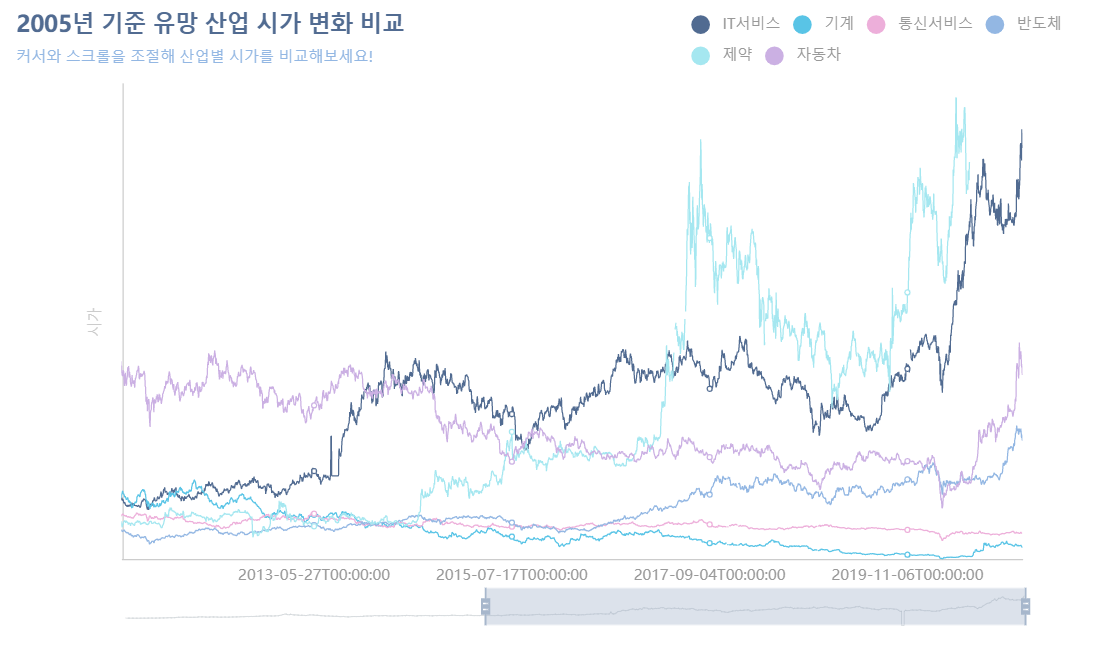

# 연도별 평균 거래량 비교

In [183]:
# 주식데이터 로드

IT서비스 = pd.read_csv('./NAVER.csv')

기계 = pd.read_csv('./두산중공업.csv')
통신서비스 = pd.read_csv('./KT.csv')


# 반도체
SK하이닉스 = pd.read_csv('./SK하이닉스.csv')
삼성전자 = pd.read_csv('./삼성전자.csv')
반도체 = (SK하이닉스[['Open','High','Low','Close','Adj Close', 'Volume']] + 삼성전자[['Open','High','Low','Close','Adj Close', 'Volume']]) / 2
반도체['Date'] = 삼성전자['Date']

# 자동차
기아 = pd.read_csv('./기아.csv')
현대 = pd.read_csv('./현대차.csv')
자동차 = (기아[['Open','High','Low','Close','Adj Close', 'Volume']] + 현대[['Open','High','Low','Close','Adj Close', 'Volume']]) / 2
자동차['Date'] = 기아['Date']

# 제약
제약 = pd.read_csv('./셀트리온.csv')

#철강 = pd.read_csv('./POSCO.csv')

# Date 컬럼 시계열 데이터 처리

IT서비스.Date = pd.to_datetime(IT서비스.Date)
기계.Date = pd.to_datetime(기계.Date)
통신서비스.Date = pd.to_datetime(통신서비스.Date)
반도체.Date = pd.to_datetime(반도체.Date)
제약.Date = pd.to_datetime(제약.Date)
자동차.Date = pd.to_datetime(자동차.Date)
#철강.Date = pd.to_datetime(철강.Date)


tab = Tab()

# 라인차트

index = IT서비스.Date.tolist()

fig_stock= (Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('IT서비스', IT서비스['Volume'].tolist())
       .add_yaxis('기계', 기계['Volume'].tolist())
       .add_yaxis('통신서비스', 통신서비스['Volume'].tolist())
       .add_yaxis('반도체', 반도체['Volume'].tolist())
       .add_yaxis('제약', 제약['Volume'].tolist())
       .add_yaxis('자동차', 자동차['Volume'].tolist())
)

fig_stock.add_xaxis(index).set_global_opts(title_opts=opts.TitleOpts(title="2005년 기준 유망 산업 거래량 변화 비교",subtitle="커서와 스크롤을 조절해 산업별 거래량을 비교해보세요!"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "거래량",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                 legend_opts=opts.LegendOpts(pos_left="60%",legend_icon='pin')
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))

fig_stock = (Grid(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
                    .add(fig_stock, grid_opts=opts.GridOpts()))

#fig_stock.render('종가비교_최종.html')
tab.add(fig_stock, '산업별 거래량 비교 Line Chart')

##### 데이터 전처리 ######
IT서비스.Date = pd.to_datetime(IT서비스.Date)
기계.Date = pd.to_datetime(기계.Date)
통신서비스.Date = pd.to_datetime(통신서비스.Date)
반도체.Date = pd.to_datetime(반도체.Date)
제약.Date = pd.to_datetime(제약.Date)
자동차.Date = pd.to_datetime(자동차.Date)

IT서비스.Date = pd.to_datetime(IT서비스.Date)
기계.Date = pd.to_datetime(기계.Date)
통신서비스.Date = pd.to_datetime(통신서비스.Date)
반도체.Date = pd.to_datetime(반도체.Date)
제약.Date = pd.to_datetime(제약.Date)
자동차.Date = pd.to_datetime(자동차.Date)

IT서비스['year'] = IT서비스.Date.dt.year
기계['year'] = 기계.Date.dt.year
통신서비스['year'] = 통신서비스.Date.dt.year
반도체['year'] = 반도체.Date.dt.year
제약['year'] = 제약.Date.dt.year
자동차['year'] = 자동차.Date.dt.year

IT서비스 = IT서비스.groupby('year').mean()
기계 = 기계.groupby('year').mean()
통신서비스 = 통신서비스.groupby('year').mean()
반도체 = 반도체.groupby('year').mean()
제약 = 제약.groupby('year').mean()
자동차 = 자동차.groupby('year').mean()

IT서비스['산업'] = 'IT서비스'
기계['산업'] = '기계'
통신서비스['산업'] = '통신서비스'
반도체['산업'] = '반도체'
제약['산업'] = '제약'
자동차['산업'] = '자동차'

df = pd.concat([IT서비스, 기계, 통신서비스, 제약, 자동차])
df = df.reset_index()
df = df[['year', '산업', 'Volume']]
##### 데이터 전처리 ######

# 파이차트

industry = df.산업.unique()

stock_percent = Timeline(
    init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
).add_schema(is_auto_play=True)

for t in df['year'].unique():
    stock_percent.add((Pie(
        init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
    ).add("", [list(z) for z in zip(industry, df[df['year'] == t]['Volume'])],
                    rosetype="radius",radius=["30%", "60%"]))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='outside', formatter="{b}\n{d}"))
    .set_global_opts(title_opts=opts.TitleOpts(title="산업별 거래량(%)", subtitle="마우스를 파이에 올려 산업별 거래량 비율을 확인해보세요!"),
                     tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                     legend_opts=opts.LegendOpts(type_ = 'scroll', pos_bottom ="70%",pos_right="0%", orient="vertical",legend_icon ='pin')),"{}도".format(t))


tab.add(stock_percent, '산업별 거래량 비교 Pie Chart')

tab.render()

'/content/render.html'

# 산업별 거래량 파이차트

In [161]:
industry = df.산업.unique()

stock_percent = Timeline(
    init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
).add_schema(is_auto_play=True)

for t in df['year'].unique():
    stock_percent.add((Pie(
        init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
    ).add("", [list(z) for z in zip(industry, df[df['year'] == t]['Volume'])],
                    rosetype="radius",radius=["30%", "60%"]))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='outside', formatter="{b}\n{d}"))
    .set_global_opts(title_opts=opts.TitleOpts(title="산업별 거래량(%)", subtitle="마우스를 파이에 올려 산업별 거래량 비율을 확인해보세요!"),
                     tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                     legend_opts=opts.LegendOpts(type_ = 'scroll', pos_bottom ="70%",pos_right="0%", orient="vertical",legend_icon ='pin')),"{}도".format(t))

stock_percent.render()

'/content/render.html'

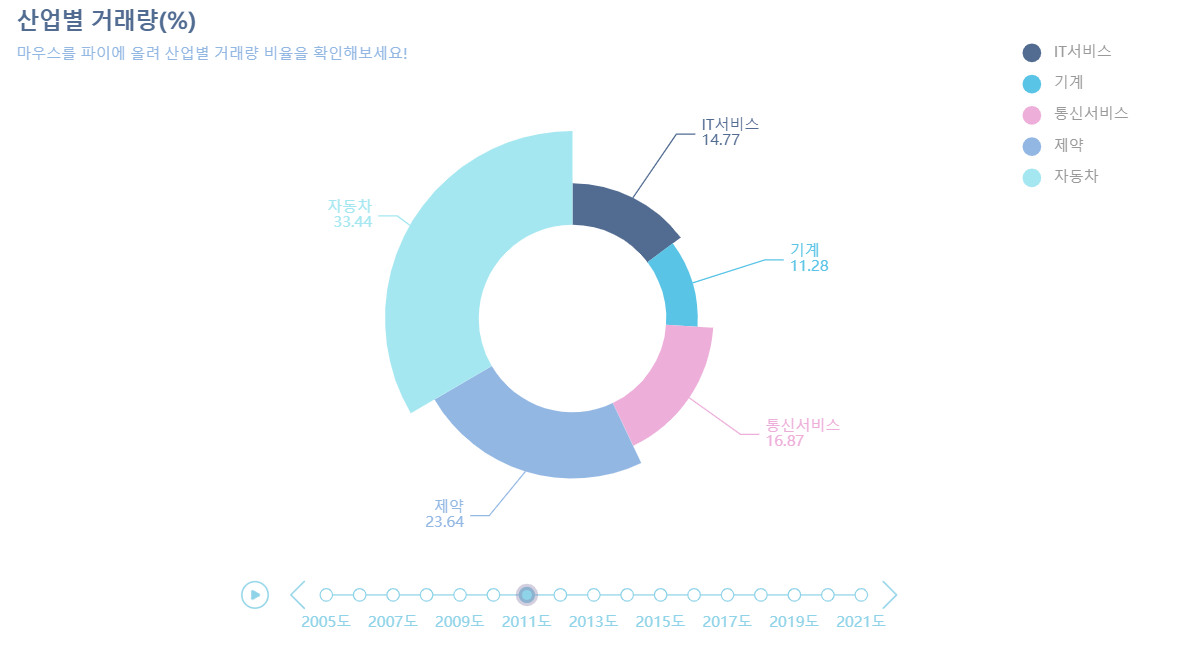

# 2019년 부터의 삼성전자 데이터

In [189]:
stock = pd.read_csv('삼성전자_2019~.csv')
stock.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA60,VMA5,Disp5
0,3631,2019-08-09,43250.0,43350.0,43050.0,43150.0,40512.441406,9685147.0,40643.880469,42817.374219,41951.142708,13182494.2,99.676608
1,3632,2019-08-12,44000.0,44000.0,43550.0,43700.0,41028.816406,8466169.0,40596.935937,42688.278906,41995.256380,12032910.8,101.063825
2,3633,2019-08-13,43500.0,43500.0,42950.0,43000.0,40371.605469,7276979.0,40503.048437,42507.545508,42015.995182,10471541.8,99.675474
3,3634,2019-08-14,43900.0,44250.0,43500.0,43700.0,41028.816406,8750135.0,40596.935937,42397.227734,42029.831771,10221062.2,101.063825
4,3635,2019-08-16,43800.0,43900.0,43300.0,43900.0,41216.593750,9528115.0,40831.654687,42293.951563,42041.363542,8741309.0,100.942747


In [191]:
del stock['Unnamed: 0']

In [192]:
stock.Date = pd.to_datetime(stock.Date)

In [193]:
index = stock.Date.tolist()

fig_stock= (Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('Adj Close', stock['Adj Close'].tolist())
       .add_yaxis('MA5', stock['MA5'].tolist())
       .add_yaxis('MA20', stock['MA20'].tolist())
       .add_yaxis('MA60', stock['MA60'].tolist())
)

fig_stock.add_xaxis(index).set_global_opts(title_opts=opts.TitleOpts(title="삼성전자 주식 골든크로스 분석",subtitle="커서와 스크롤을 조절해 각 이동평균선을 비교해보세요!"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "이동평균",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                 legend_opts=opts.LegendOpts(pos_left="60%",legend_icon='pin')
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))

fig_stock = (Grid(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
                    .add(fig_stock, grid_opts=opts.GridOpts()))
fig_stock.render()

'/content/render.html'